In [82]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [83]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

In [84]:
text_df = df.drop(['Unnamed: 0','Date Created','Number of Likes','Source of Tweet','Sentiment'], axis=1)
text_df.head()

,Tweet
0,What are we drinking today @TucanTribe \n@MadB...
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,Worth reading while watching #WorldCup2022 htt...
3,Golden Maknae shinning bright\n\nhttps://t.co/...
4,"If the BBC cares so much about human rights, h..."


In [85]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

What are we drinking today @TucanTribe 
@MadBears_ 
@lkinc_algo 
@al_goanna 

#WorldCup2022 https://t.co/Oga3TzvG5h 

Amazing @CanadaSoccerEN  #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986.  Can’t wait to see these boys in action!

This is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8 

Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU 

Golden Maknae shinning bright

https://t.co/4AyZbzGTX4
#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK 
@BTS_twt 

If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony?? https://t.co/f72P03ZN2k 



In [86]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [87]:
text_df.Tweet = text_df['Tweet'].apply(data_processing)

In [88]:
text_df = text_df.drop_duplicates('Tweet')

In [89]:
import string
english_punctuations=string.punctuation
print(english_punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [90]:
#clearning and removing punctuations
import string
english_punctuations=string.punctuation

punctuation_list=english_punctuations

def cleaning_punctuations(data):
    translator=str.maketrans('', '',punctuation_list)
    return data.translate(translator)

text_df['Tweet']=text_df['Tweet'].apply(lambda x: cleaning_punctuations(x))

In [91]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [92]:
text_df['Tweet'] = text_df['Tweet'].apply(lambda x: stemming(x))

In [93]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

drinking today tucantribe madbears lkincalgo algoanna worldcup2022 

amazing canadasocceren worldcup2022 launch video shows much face canada mens national team changed since last world cup entry 1986 cant wait see boys action canada fifa world cup opening video 

worth reading watching worldcup2022 

golden maknae shinning bright jeonjungkook jungkook 전정국 정국 jk goldenmaknae bunny kookie jungshook bts 방탄소년단 worldcup2022 fifakook btstwt 

bbc cares much human rights homosexual rights women rights say opening ceremony saying opening ceremony bbc censor worldcup2022 opening ceremony 



In [94]:
import nltk

In [95]:
nltk.download('wordnet')
lm=nltk.WordNetLemmatizer()

def lemmatizer_on_word(data):
    text=[lm.lemmatize(word) for word in data]
    return data




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [96]:
text_df['Tweet']=text_df['Tweet'].apply(lambda x:lemmatizer_on_word(x))

In [97]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

drinking today tucantribe madbears lkincalgo algoanna worldcup2022 

amazing canadasocceren worldcup2022 launch video shows much face canada mens national team changed since last world cup entry 1986 cant wait see boys action canada fifa world cup opening video 

worth reading watching worldcup2022 

golden maknae shinning bright jeonjungkook jungkook 전정국 정국 jk goldenmaknae bunny kookie jungshook bts 방탄소년단 worldcup2022 fifakook btstwt 

bbc cares much human rights homosexual rights women rights say opening ceremony saying opening ceremony bbc censor worldcup2022 opening ceremony 



In [98]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21345 entries, 0 to 22523
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   21345 non-null  object
dtypes: object(1)
memory usage: 333.5+ KB


In [99]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [100]:
text_df['polarity'] = text_df['Tweet'].apply(polarity)

In [101]:
text_df.head(5)

,Tweet,polarity
0,drinking today tucantribe madbears lkincalgo a...,0.000
1,amazing canadasocceren worldcup2022 launch vid...,0.225
2,worth reading watching worldcup2022,0.300
3,golden maknae shinning bright jeonjungkook jun...,0.500
4,bbc cares much human rights homosexual rights ...,0.000


In [102]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [103]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [104]:
text_df.head()

,Tweet,polarity,sentiment
0,drinking today tucantribe madbears lkincalgo a...,0.000,Neutral
1,amazing canadasocceren worldcup2022 launch vid...,0.225,Positive
2,worth reading watching worldcup2022,0.300,Positive
3,golden maknae shinning bright jeonjungkook jun...,0.500,Positive
4,bbc cares much human rights homosexual rights ...,0.000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

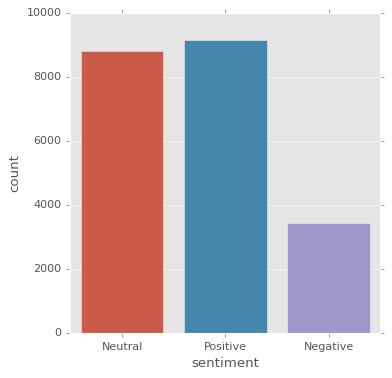

In [105]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

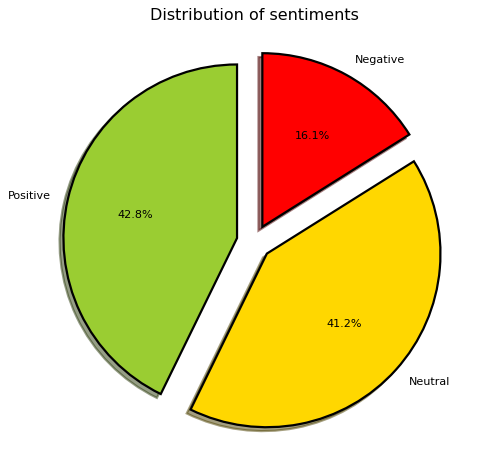

In [106]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [107]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Tweet,polarity,sentiment
10604,fifa world cup go best luck teams fifaworldcup...,1.0,Positive
1814,five best websites working making money online...,1.0,Positive
22175,picture perfect one dance 2 worldcup2022 messi...,1.0,Positive
17867,another blow worldcup2022 one worlds best players,1.0,Positive
11799,qatar fifa foxsports im support usmnt im suppo...,1.0,Positive


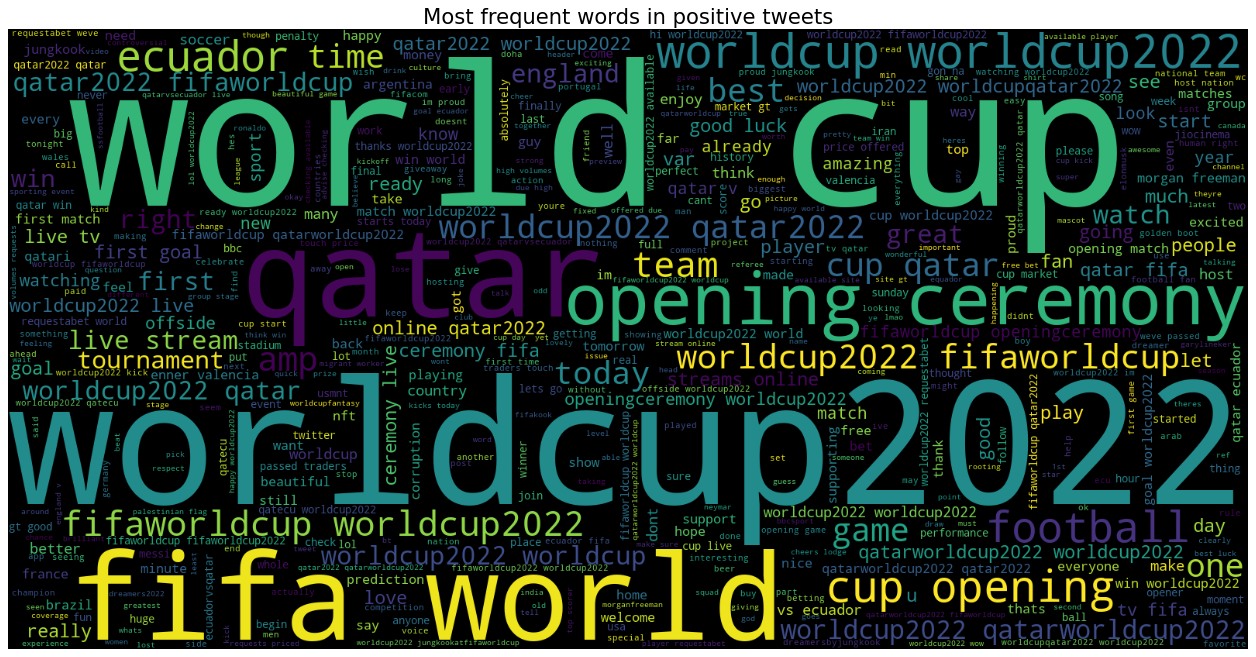

In [108]:
text = ' '.join([word for word in pos_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [109]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Tweet,polarity,sentiment
6148,fun fact host team 92 year history world cup l...,-4.625929e-18,Negative
12446,fun fact 92 year history world cup host never ...,-9.251859e-18,Negative
3237,exciting game far soccerpinnipeds worldcup2022,-9.251859e-18,Negative
3641,qatar really playing today dont think shot goa...,-1.387779e-17,Negative
3417,qatar ecuator game see difference academy deve...,-1.850372e-17,Negative


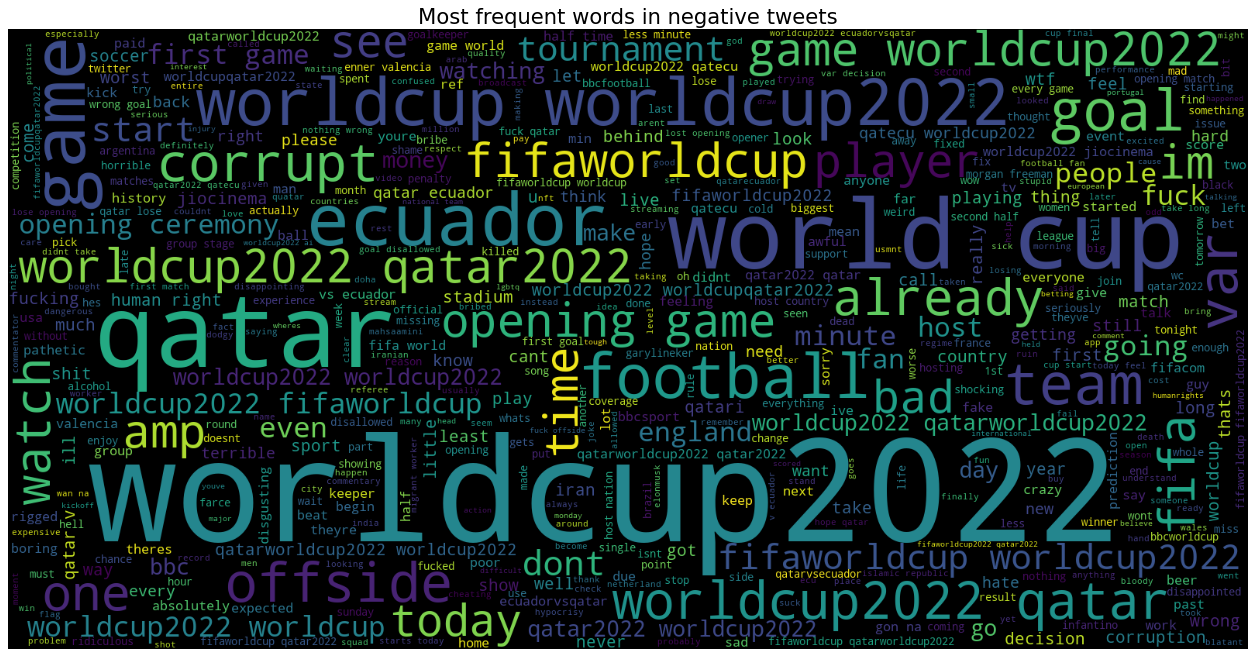

In [110]:
text = ' '.join([word for word in neg_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [111]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Tweet,polarity,sentiment
0,drinking today tucantribe madbears lkincalgo a...,0.0,Neutral
14656,1 hour go worldcup2022,0.0,Neutral
14643,thefootballverse worlds2022 worldcup2022 nike ...,0.0,Neutral
14644,yoongi hyungs always matter dreamers2022 jungk...,0.0,Neutral
14645,oh morgan mate involved shitshow worldcup2022,0.0,Neutral


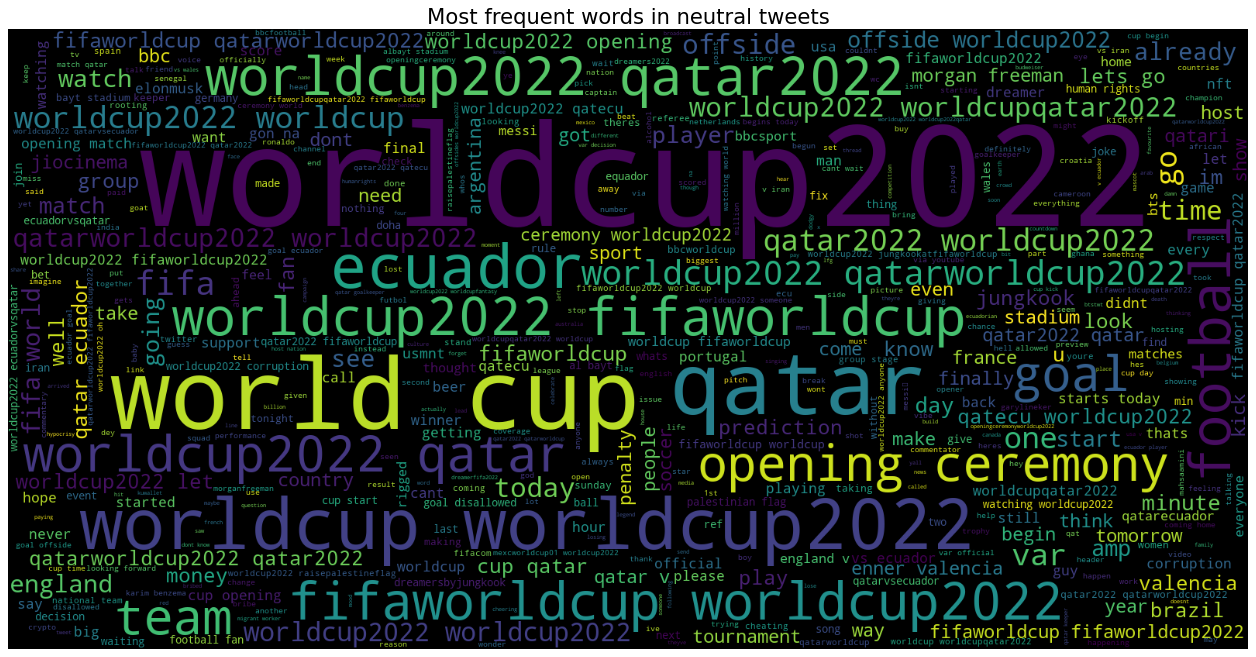

In [112]:
text = ' '.join([word for word in neutral_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [113]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Tweet'])

In [114]:
X = text_df['Tweet']
Y = text_df['sentiment']
X = vect.transform(X)

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [116]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (17076, 160122)
Size of y_train: (17076,)
Size of x_test: (4269, 160122)
Size of y_test: (4269,)


In [117]:
import warnings
warnings.filterwarnings('ignore')

Logestic Regression

In [118]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.69%


In [119]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 454  139   74]
 [  12 1743   16]
 [  40  159 1632]]


              precision    recall  f1-score   support

    Negative       0.90      0.68      0.77       667
     Neutral       0.85      0.98      0.91      1771
    Positive       0.95      0.89      0.92      1831

    accuracy                           0.90      4269
   macro avg       0.90      0.85      0.87      4269
weighted avg       0.90      0.90      0.89      4269



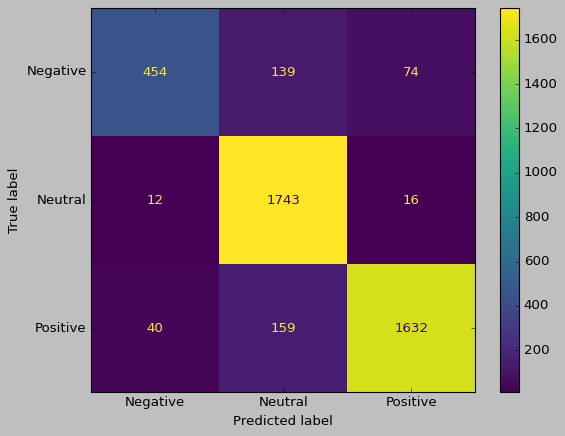

In [120]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

GridSearchCV

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [123]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [124]:
y_pred = grid.predict(x_test)

In [125]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 91.50%


In [126]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 496  105   66]
 [  11 1745   15]
 [  40  126 1665]]


              precision    recall  f1-score   support

    Negative       0.91      0.74      0.82       667
     Neutral       0.88      0.99      0.93      1771
    Positive       0.95      0.91      0.93      1831

    accuracy                           0.91      4269
   macro avg       0.91      0.88      0.89      4269
weighted avg       0.92      0.91      0.91      4269



LinearSVC

In [127]:
from sklearn.svm import LinearSVC

In [128]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [129]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 92.43%


In [130]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 513   87   67]
 [  12 1749   10]
 [  42  105 1684]]


              precision    recall  f1-score   support

    Negative       0.90      0.77      0.83       667
     Neutral       0.90      0.99      0.94      1771
    Positive       0.96      0.92      0.94      1831

    accuracy                           0.92      4269
   macro avg       0.92      0.89      0.90      4269
weighted avg       0.93      0.92      0.92      4269



Grid Linear SVC

In [131]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [132]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [133]:
y_pred = grid.predict(x_test)

In [134]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 92.57%


In [135]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 518   82   67]
 [  12 1750    9]
 [  42  105 1684]]


              precision    recall  f1-score   support

    Negative       0.91      0.78      0.84       667
     Neutral       0.90      0.99      0.94      1771
    Positive       0.96      0.92      0.94      1831

    accuracy                           0.93      4269
   macro avg       0.92      0.89      0.91      4269
weighted avg       0.93      0.93      0.92      4269



RandomForest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rfcl= RandomForestClassifier()
rfcl.fit(x_train, y_train)

RandomForestClassifier()

In [138]:
rfcl_pred = rfcl.predict(x_test)
rfcl_acc = accuracy_score(rfcl_pred, y_test)
print("test accuracy: {:.2f}%".format(rfcl_acc*100))

test accuracy: 89.67%


In [139]:
print(confusion_matrix(y_test, rfcl_pred))
print("\n")
print(classification_report(y_test, rfcl_pred))

[[ 438  123  106]
 [   2 1744   25]
 [  28  157 1646]]


              precision    recall  f1-score   support

    Negative       0.94      0.66      0.77       667
     Neutral       0.86      0.98      0.92      1771
    Positive       0.93      0.90      0.91      1831

    accuracy                           0.90      4269
   macro avg       0.91      0.85      0.87      4269
weighted avg       0.90      0.90      0.89      4269



In [140]:
from sklearn.naive_bayes import BernoulliNB

In [141]:
NB= BernoulliNB()
NB.fit(x_train, y_train)

BernoulliNB()

In [142]:
NB_pred = NB.predict(x_test)
NB_acc = accuracy_score(NB_pred, y_test)
print("test accuracy: {:.2f}%".format(NB_acc*100))

test accuracy: 68.85%


In [143]:
print(confusion_matrix(y_test, NB_pred))
print("\n")
print(classification_report(y_test, NB_pred))

[[  22  428  217]
 [   1 1713   57]
 [   9  618 1204]]


              precision    recall  f1-score   support

    Negative       0.69      0.03      0.06       667
     Neutral       0.62      0.97      0.76      1771
    Positive       0.81      0.66      0.73      1831

    accuracy                           0.69      4269
   macro avg       0.71      0.55      0.52      4269
weighted avg       0.71      0.69      0.64      4269



In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [146]:
model_pred = model.predict(x_test)
model_acc = accuracy_score(model_pred, y_test)
print("test accuracy: {:.2f}%".format(model_acc*100))

test accuracy: 93.65%


In [147]:
print(confusion_matrix(y_test, model_pred))
print("\n")
print(classification_report(y_test, model_pred))

[[ 530   35  102]
 [  10 1752    9]
 [  79   36 1716]]


              precision    recall  f1-score   support

    Negative       0.86      0.79      0.82       667
     Neutral       0.96      0.99      0.97      1771
    Positive       0.94      0.94      0.94      1831

    accuracy                           0.94      4269
   macro avg       0.92      0.91      0.91      4269
weighted avg       0.94      0.94      0.94      4269



KNeighbors

In [148]:
from sklearn.neighbors import KNeighborsClassifier 

In [149]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [150]:
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(knn_pred, y_test)
print("test accuracy: {:.2f}%".format(knn_acc*100))

test accuracy: 51.82%


In [151]:
print(confusion_matrix(y_test, knn_pred))
print("\n")
print(classification_report(y_test, knn_pred))

[[  66  585   16]
 [   3 1752   16]
 [  32 1405  394]]


              precision    recall  f1-score   support

    Negative       0.65      0.10      0.17       667
     Neutral       0.47      0.99      0.64      1771
    Positive       0.92      0.22      0.35      1831

    accuracy                           0.52      4269
   macro avg       0.68      0.43      0.39      4269
weighted avg       0.69      0.52      0.44      4269



SVC

In [152]:
from sklearn.svm import SVC

In [153]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [154]:
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 83.37%


In [155]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 305  158  204]
 [   4 1660  107]
 [  35  202 1594]]


              precision    recall  f1-score   support

    Negative       0.89      0.46      0.60       667
     Neutral       0.82      0.94      0.88      1771
    Positive       0.84      0.87      0.85      1831

    accuracy                           0.83      4269
   macro avg       0.85      0.76      0.78      4269
weighted avg       0.84      0.83      0.82      4269

